### 1. IMPORTING LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importing warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read the dataset

leads=pd.read_csv(r"C:\Users\91915\Downloads\Lead+Scoring+Case+Study (1)\Lead Scoring Assignment\Leads.csv")

In [3]:
# Looking at the first few entries

leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
# Checking the info to see the types of the feature variables and the null values present#checking total rows and cols in dataset
leads.shape

(9240, 37)

In [5]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [6]:
# Checking the summary of the dataset

leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [7]:
# Inspecting the different columns in the dataset

for col in leads.columns:
    print(col)

Prospect ID
Lead Number
Lead Origin
Lead Source
Do Not Email
Do Not Call
Converted
TotalVisits
Total Time Spent on Website
Page Views Per Visit
Last Activity
Country
Specialization
How did you hear about X Education
What is your current occupation
What matters most to you in choosing a course
Search
Magazine
Newspaper Article
X Education Forums
Newspaper
Digital Advertisement
Through Recommendations
Receive More Updates About Our Courses
Tags
Lead Quality
Update me on Supply Chain Content
Get updates on DM Content
Lead Profile
City
Asymmetrique Activity Index
Asymmetrique Profile Index
Asymmetrique Activity Score
Asymmetrique Profile Score
I agree to pay the amount through cheque
A free copy of Mastering The Interview
Last Notable Activity


### 2. Data Cleaning and Preparation

In [8]:
#dropping Lead Number and Prospect ID since they have all unique values

leads.drop(['Prospect ID', 'Lead Number'], 1, inplace = True)

In [9]:
# Checking the number of missing values in each column

leads.isnull().sum().sort_values(ascending=False)

Lead Quality                                     4767
Asymmetrique Activity Index                      4218
Asymmetrique Profile Score                       4218
Asymmetrique Profile Index                       4218
Asymmetrique Activity Score                      4218
Tags                                             3353
Lead Profile                                     2709
What matters most to you in choosing a course    2709
What is your current occupation                  2690
Country                                          2461
How did you hear about X Education               2207
Specialization                                   1438
City                                             1420
Page Views Per Visit                              137
TotalVisits                                       137
Last Activity                                     103
Lead Source                                        36
I agree to pay the amount through cheque            0
A free copy of Mastering The

In [10]:
# Let's now check the percentage of missing values in each column

round(100*(leads.isnull().sum().sort_values(ascending=False)/len(leads.index)), 2)

Lead Quality                                     51.59
Asymmetrique Activity Index                      45.65
Asymmetrique Profile Score                       45.65
Asymmetrique Profile Index                       45.65
Asymmetrique Activity Score                      45.65
Tags                                             36.29
Lead Profile                                     29.32
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
How did you hear about X Education               23.89
Specialization                                   15.56
City                                             15.37
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
I agree to pay the amount through cheque          0.00
A free cop

As we can see there are lot of columns which have high number of missing values. Clearly, these columns are not useful. Since, there are 9000 datapoints in our dataframe, let's eliminate the columns having greater than 3000 missing values as they are of no use to us.

In [11]:
# Dropping all the columns in which greater than 3000 missing values are present

for col in leads.columns:
    if leads[col].isnull().sum() > 3000:
        leads.drop(col, 1, inplace=True)



In [12]:
leads.isnull().sum().sort_values(ascending=False)

Lead Profile                                     2709
What matters most to you in choosing a course    2709
What is your current occupation                  2690
Country                                          2461
How did you hear about X Education               2207
Specialization                                   1438
City                                             1420
TotalVisits                                       137
Page Views Per Visit                              137
Last Activity                                     103
Lead Source                                        36
Receive More Updates About Our Courses              0
Update me on Supply Chain Content                   0
Get updates on DM Content                           0
Lead Origin                                         0
Digital Advertisement                               0
I agree to pay the amount through cheque            0
A free copy of Mastering The Interview              0
Through Recommendations     

In [13]:
# Let's now check the percentage of missing values in each column

round(100*(leads.isnull().sum().sort_values(ascending=False)/len(leads.index)), 2)

Lead Profile                                     29.32
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
How did you hear about X Education               23.89
Specialization                                   15.56
City                                             15.37
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
Receive More Updates About Our Courses            0.00
Update me on Supply Chain Content                 0.00
Get updates on DM Content                         0.00
Lead Origin                                       0.00
Digital Advertisement                             0.00
I agree to pay the amount through cheque          0.00
A free copy of Mastering The Interview            0.00
Through Re

In [14]:
# Getting the value counts of all the columns


for column in leads:
    print(leads[column].astype('category').value_counts())
    print('___________________________________________________')


Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64
___________________________________________________
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
WeLearn                 1
Pay per Click Ads       1
NC_EDM                  1
blog                    1
testone                 1
welearnblog_Home        1
youtubechannel          1
Name: Lead Source, dtype: int64
___________________________________________________
No     8506
Yes     734
Name: Do Not Email, dtype: int64
___________________________________________________
No     9238
Yes  

There are few columns in which there is a level called 'Select' which basically means that the student had not selected the option for that particular column which is why it shows 'Select'. These values are as good as missing values and hence we need to identify the value counts of the level 'Select' in all the columns that it is present.

In [15]:
#checking value counts of 'How did you hear about X Education' column

leads['How did you hear about X Education'].value_counts(dropna=False)

Select                   5043
NaN                      2207
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64

In [16]:
#checking value counts of Specialization column

leads['Specialization'].value_counts(dropna=False)

Select                               1942
NaN                                  1438
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [17]:
#checking value counts of 'Lead Profile' column

leads['Lead Profile'].value_counts(dropna=False)

Select                         4146
NaN                            2709
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

In [18]:
#checking value counts of 'City' column

leads['City'].value_counts(dropna=False)

Mumbai                         3222
Select                         2249
NaN                            1420
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

These columns have select values so we can replace it with Nan 

In [19]:
# Assigning the np.NaN to the column values which are mentioned as Select
select_varlist = ['Specialization','How did you hear about X Education','Lead Profile','City']

##Checking the Unique values with counts in all remaining fields after replacing with np.NaN
for x in select_varlist:
    leads[x].replace('Select',np.NaN,inplace=True)

In [20]:
# Let's now check the percentage of missing values in each column

round(100*(leads.isnull().sum().sort_values(ascending=False)/len(leads.index)), 2)

How did you hear about X Education               78.46
Lead Profile                                     74.19
City                                             39.71
Specialization                                   36.58
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
Receive More Updates About Our Courses            0.00
Update me on Supply Chain Content                 0.00
Get updates on DM Content                         0.00
Lead Origin                                       0.00
Digital Advertisement                             0.00
I agree to pay the amount through cheque          0.00
A free copy of Mastering The Interview            0.00
Through Re

In [21]:
leads.isnull().sum().sort_values(ascending=False)

How did you hear about X Education               7250
Lead Profile                                     6855
City                                             3669
Specialization                                   3380
What matters most to you in choosing a course    2709
What is your current occupation                  2690
Country                                          2461
TotalVisits                                       137
Page Views Per Visit                              137
Last Activity                                     103
Lead Source                                        36
Receive More Updates About Our Courses              0
Update me on Supply Chain Content                   0
Get updates on DM Content                           0
Lead Origin                                         0
Digital Advertisement                               0
I agree to pay the amount through cheque            0
A free copy of Mastering The Interview              0
Through Recommendations     

In [22]:
#Drop all the columns with more than 40% missing values
cols=leads.columns

for i in cols:
    if((100*(leads[i].isnull().sum()/len(leads.index))) >= 40):
        leads.drop(i, 1, inplace = True)

In [23]:
round(100*(leads.isnull().sum().sort_values(ascending=False)/len(leads.index)), 2)

City                                             39.71
Specialization                                   36.58
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
Receive More Updates About Our Courses            0.00
Update me on Supply Chain Content                 0.00
Lead Origin                                       0.00
Digital Advertisement                             0.00
Get updates on DM Content                         0.00
I agree to pay the amount through cheque          0.00
A free copy of Mastering The Interview            0.00
Through Recommendations                           0.00
Search                                            0.00
Newspaper 

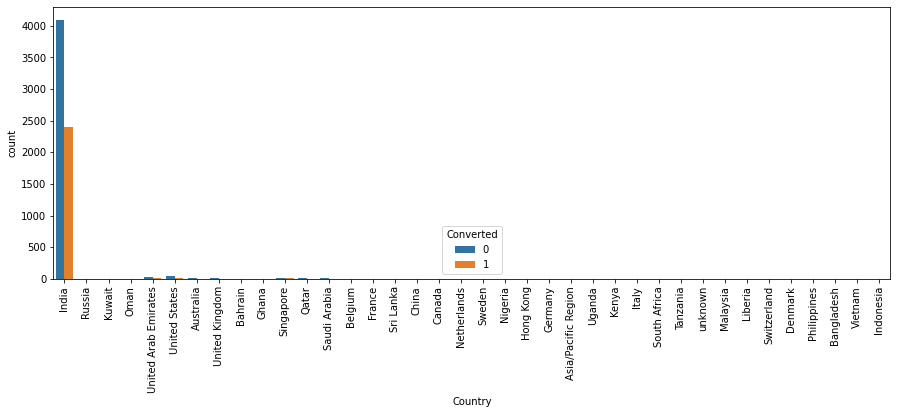

In [24]:
#plotting spread of Country columnn after replacing NaN values

plt.figure(figsize=(15,5))
country=sns.countplot(leads.Country, hue=leads.Converted)
country.set_xticklabels(country.get_xticklabels(),rotation=90)
plt.show()

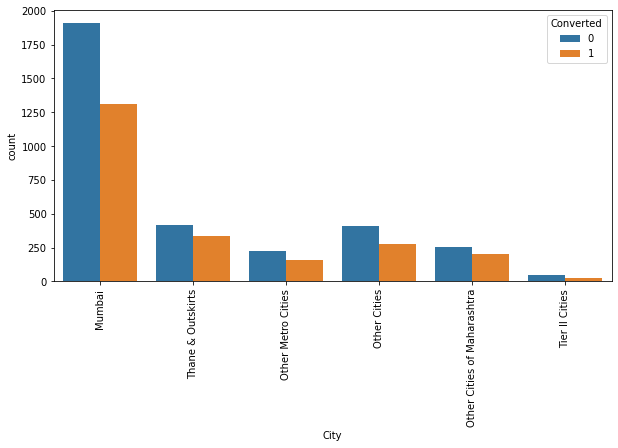

In [25]:
#plotting spread of City columnn after replacing NaN values

plt.figure(figsize=(10,5))
city=sns.countplot(leads.City, hue=leads.Converted)
city.set_xticklabels(city.get_xticklabels(),rotation=90)
plt.show()

In [26]:
# Dropping both the location fields as neither the Country nor City have a major influence on conversion rates

leads=leads.drop('Country',axis=1)
leads=leads.drop('City',axis=1)

In [27]:
#checking value counts of Specialization column

leads['Specialization'].value_counts(dropna=False)

NaN                                  3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [28]:
# Specialization is an important feature as we need to know the background of the student
# we can replace Nan values with Not Specified

leads['Specialization'] = leads['Specialization'].replace(np.nan, 'Not Specified')

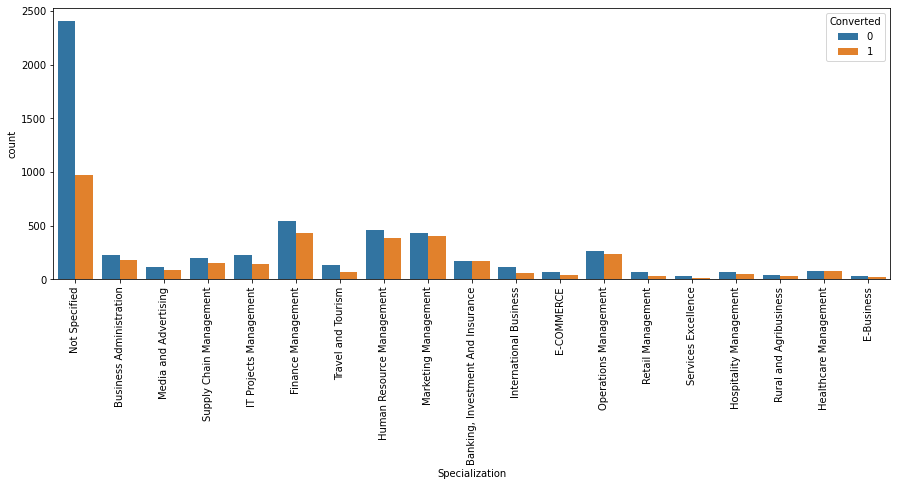

In [29]:
#plotting spread of Specialization columnn 

plt.figure(figsize=(15,5))
Spec=sns.countplot(leads.Specialization, hue=leads.Converted)
Spec.set_xticklabels(Spec.get_xticklabels(),rotation=90)
plt.show()

Financial and Marketing management have have higher number of leads as well as leads converted.
So this is definitely a significant variable and should not be dropped.

In [30]:
#combining Management Specializations because they show similar trends

leads['Specialization'] = leads['Specialization'].replace(['Finance Management','Human Resource Management',
                                                           'Marketing Management','Operations Management',
                                                           'IT Projects Management','Supply Chain Management',
                                                    'Healthcare Management','Hospitality Management',
                                                           'Retail Management'],'Management_Specializations') 

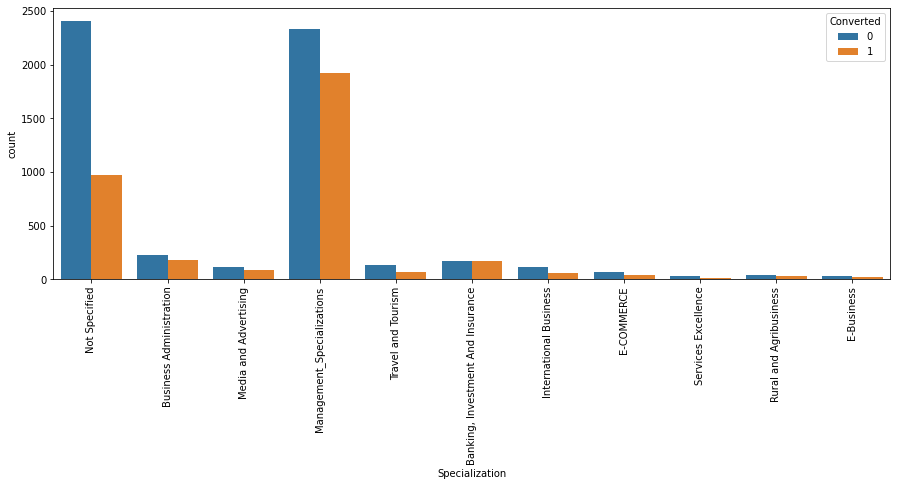

In [31]:
#visualizing count of Variable based on Converted value


plt.figure(figsize=(15,5))
Spec=sns.countplot(leads.Specialization, hue=leads.Converted)
Spec.set_xticklabels(Spec.get_xticklabels(),rotation=90)
plt.show()

In [32]:
#What is your current occupation

leads['What is your current occupation'].value_counts(dropna=False)

Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [33]:
# Replacing Nan values with mode "Unemployed"

leads['What is your current occupation'] = leads['What is your current occupation'].replace(np.nan, 'Unemployed')

In [34]:
#checking value count

leads['What is your current occupation'].value_counts(dropna=False)

Unemployed              8290
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

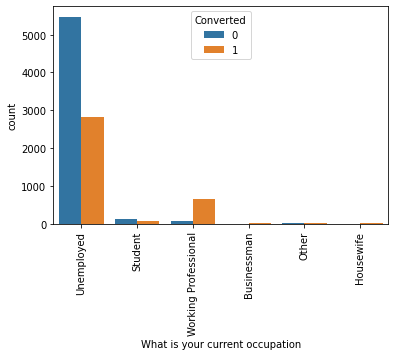

In [35]:
#visualizing count of Variable based on Converted value

s1=sns.countplot(leads['What is your current occupation'], hue=leads.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

- Working Professional have high conversion rate.
- Unemployed personals are most in terms of numbers.

In [36]:
#checking value counts

leads['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [37]:
#replacing Nan values with Mode "Better Career Prospects"

leads['What matters most to you in choosing a course'] = leads['What matters most to you in choosing a course'].replace(np.nan,'Better Career Prospects')

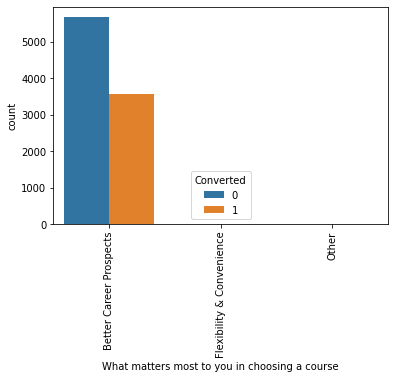

In [38]:
#visualizing count of Variable based on Converted value

s1=sns.countplot(leads['What matters most to you in choosing a course'], hue=leads.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [39]:
#checking value counts of variable
leads['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      9237
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

The variable 'What matters most to you in choosing a course' has the level 'Better Career Prospects' 6528 times while the other two levels appear once twice and once respectively. So we should drop this column as well.

In [40]:
leads=leads.drop('What matters most to you in choosing a course',axis=1)

In [41]:
leads.isnull().sum().sort_values(ascending=False)

TotalVisits                                 137
Page Views Per Visit                        137
Last Activity                               103
Lead Source                                  36
Lead Origin                                   0
X Education Forums                            0
A free copy of Mastering The Interview        0
I agree to pay the amount through cheque      0
Get updates on DM Content                     0
Update me on Supply Chain Content             0
Receive More Updates About Our Courses        0
Through Recommendations                       0
Digital Advertisement                         0
Newspaper                                     0
Magazine                                      0
Newspaper Article                             0
Search                                        0
What is your current occupation               0
Specialization                                0
Total Time Spent on Website                   0
Converted                               

In [42]:
#checking value counts of Lead Source column

leads['Lead Source'].value_counts(dropna=False)

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

#### Google is having highest number of occurences, hence we will impute the missing values with label 'Google'

In [43]:
#replacing Nan Value with Google
leads['Lead Source'] = leads['Lead Source'].replace(np.nan,'Google')


In [44]:
#'Lead Source' is having same label name 'Google' but in different format i.e 'google', So converting google to Google
leads['Lead Source'] = leads['Lead Source'].replace('google','Google')

In [45]:
#combining low frequency values to Others

leads['Lead Source'] = leads['Lead Source'].replace(['bing','Click2call','Press_Release',
                                                     'youtubechannel','welearnblog_Home',
                                                     'WeLearn','blog','Pay per Click Ads',
                                                    'testone','NC_EDM','Live Chat'] ,'Others')

In [46]:
leads['Lead Source'].value_counts(dropna=False)

Google              2909
Direct Traffic      2543
Olark Chat          1755
Organic Search      1154
Reference            534
Welingak Website     142
Referral Sites       125
Facebook              55
Others                21
Social Media           2
Name: Lead Source, dtype: int64

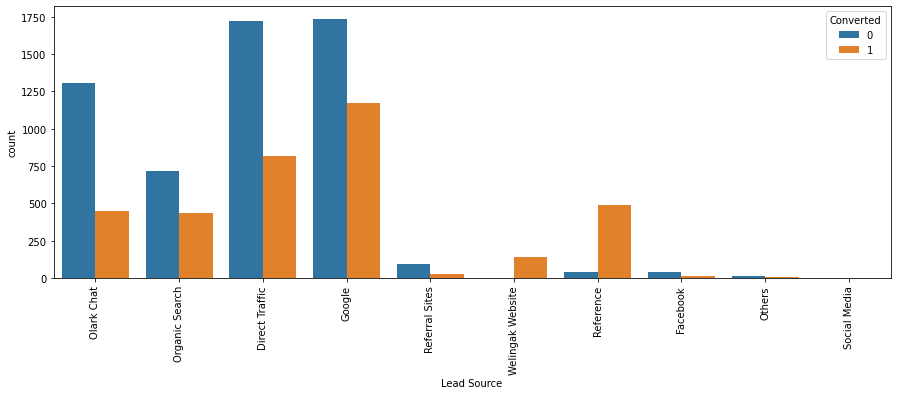

In [47]:
#visualizing count of Variable based on Converted value

plt.figure(figsize=(15,5))
s1=sns.countplot(leads['Lead Source'], hue=leads.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

- Maximum Leads are generated by Google and Direct Traffic.
- Conversion rate of Reference leads and Welinkgak Website leads is very high.

In [48]:
# Last Activity:

leads['Last Activity'].value_counts(dropna=False)

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
NaN                              103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

#### Missing values can be imputed with mode value "Email Opened"

In [49]:
# Replacing Nan Values with mode value "Email Opened"

leads['Last Activity'] = leads['Last Activity'].replace(np.nan,'Email Opened')

In [50]:
#combining low frequency values
leads['Last Activity'] = leads['Last Activity'].replace(['Unreachable','Unsubscribed',
                                                       'Had a Phone Conversation', 
                                                       'Approached upfront',
                                                        'View in browser link Clicked',       
                                                        'Email Marked Spam',                  
                                                        'Email Received','Resubscribed to emails',
                                                         'Visited Booth in Tradeshow'],'Others')

In [51]:
leads['Last Activity'].value_counts(dropna=False)

Email Opened                 3540
SMS Sent                     2745
Olark Chat Conversation       973
Page Visited on Website       640
Converted to Lead             428
Email Bounced                 326
Email Link Clicked            267
Others                        205
Form Submitted on Website     116
Name: Last Activity, dtype: int64

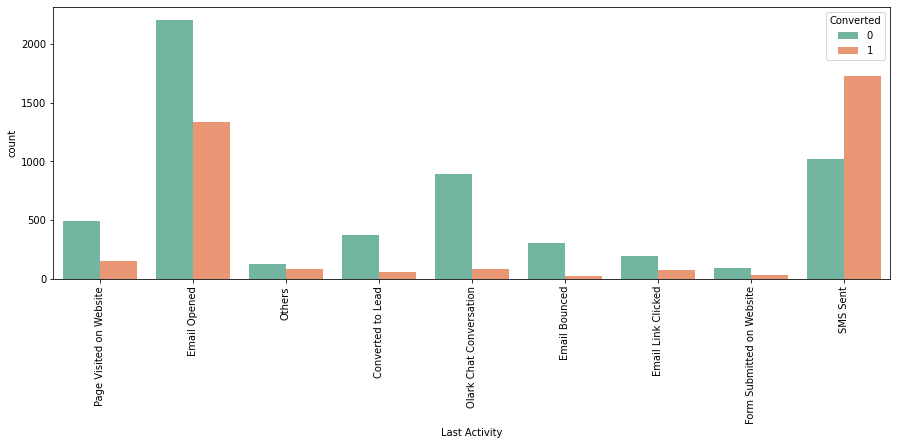

In [52]:
#visualizing count of Last Activity Variable 

plt.figure(figsize=(15,5))
s1=sns.countplot(x='Last Activity', hue='Converted' , data = leads , palette = 'Set2')
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [53]:
# Checking the Null Values in All Columns

round(100*(leads.isnull().sum()/len(leads.index)), 2)

Lead Origin                                 0.00
Lead Source                                 0.00
Do Not Email                                0.00
Do Not Call                                 0.00
Converted                                   0.00
TotalVisits                                 1.48
Total Time Spent on Website                 0.00
Page Views Per Visit                        1.48
Last Activity                               0.00
Specialization                              0.00
What is your current occupation             0.00
Search                                      0.00
Magazine                                    0.00
Newspaper Article                           0.00
X Education Forums                          0.00
Newspaper                                   0.00
Digital Advertisement                       0.00
Through Recommendations                     0.00
Receive More Updates About Our Courses      0.00
Update me on Supply Chain Content           0.00
Get updates on DM Co

In [54]:
# Dropping all rows which have Nan Values. Since the number of Dropped rows is less than 2%, it will not affect the model

leads = leads.dropna()

In [55]:
#Checking percentage of Null Values in All Columns

round(100*(leads.isnull().sum()/len(leads.index)), 2)

Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 0.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        0.0
Last Activity                               0.0
Specialization                              0.0
What is your current occupation             0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                     0.0
Receive More Updates About Our Courses      0.0
Update me on Supply Chain Content           0.0
Get updates on DM Content               

In [56]:
#Lead Origin

leads['Lead Origin'].value_counts(dropna=False)

Landing Page Submission    4886
API                        3578
Lead Add Form               608
Lead Import                  31
Name: Lead Origin, dtype: int64

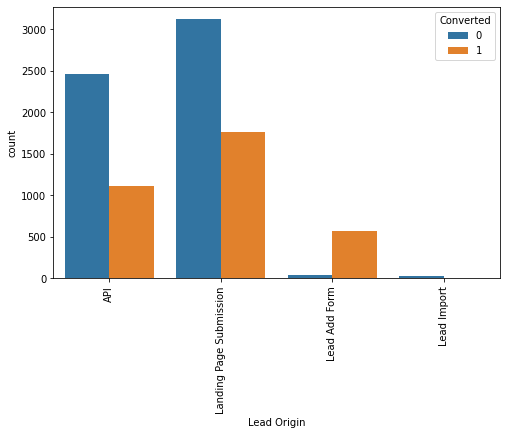

In [57]:
#visualizing count of Variable based on Converted value

plt.figure(figsize=(8,5))
s1=sns.countplot(leads['Lead Origin'], hue=leads.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

- API and Landing Page Submission bring higher number of leads as well as conversion.
- Lead Add Form has a very high conversion rate but count of leads are not very high.
- Lead Import and Quick Add Form get very few leads.

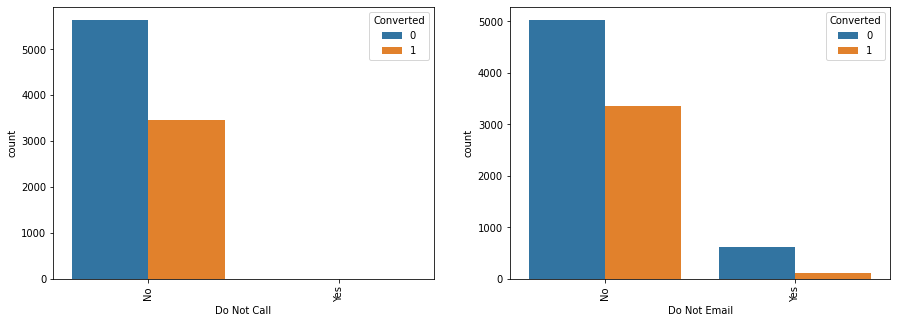

In [58]:
#Do Not Email & Do Not Call
#visualizing count of Variable based on Converted value

plt.figure(figsize=(15,5))

s1=plt.subplot(1, 2, 1)
s1=sns.countplot(leads['Do Not Call'], hue=leads.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)

s2=plt.subplot(1, 2, 2)
s2=sns.countplot(leads['Do Not Email'], hue=leads.Converted)
s2.set_xticklabels(s2.get_xticklabels(),rotation=90)
plt.show()

In [59]:
#checking value counts of last Notable Activity
leads['Last Notable Activity'].value_counts()

Modified                        3270
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails             1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Name: Last Notable Activity, dtype: int64

In [60]:
#clubbing lower frequency values

leads['Last Notable Activity'] = leads['Last Notable Activity'].replace(['Had a Phone Conversation',
                                                                       'Email Marked Spam',
                                                                         'Unreachable',
                                                                         'Unsubscribed',
                                                                         'Email Bounced',                                                                    
                                                                       'Resubscribed to emails',
                                                                       'View in browser link Clicked',
                                                                       'Approached upfront', 
                                                                       'Form Submitted on Website', 
                                                                       'Email Received'],'Other_Notable_activity')

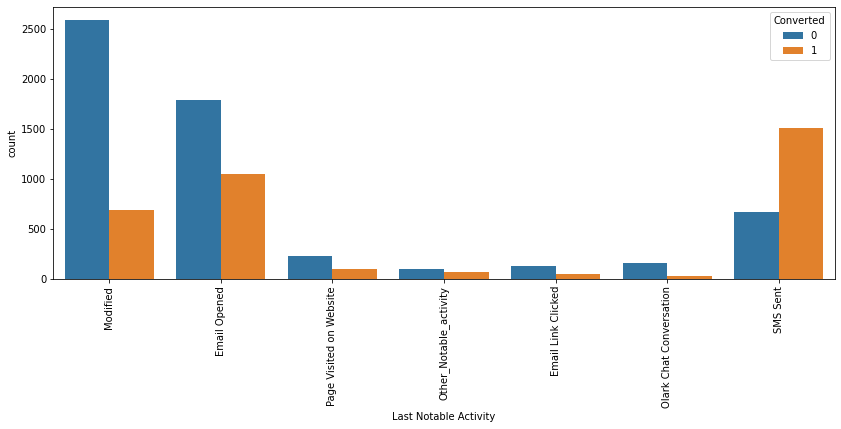

In [61]:
#visualizing count of Variable based on Converted value

plt.figure(figsize = (14,5))
ax1=sns.countplot(x = "Last Notable Activity", hue = "Converted", data = leads)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)
plt.show()

In [62]:
#checking value counts for variable

leads['Last Notable Activity'].value_counts()

Modified                   3270
Email Opened               2827
SMS Sent                   2172
Page Visited on Website     318
Olark Chat Conversation     183
Email Link Clicked          173
Other_Notable_activity      160
Name: Last Notable Activity, dtype: int64

In [63]:
#checking value counts for Do Not Call

leads['Do Not Call'].value_counts(dropna=False)

No     9101
Yes       2
Name: Do Not Call, dtype: int64

In [64]:
#checking value counts for Do Not Email

leads['Do Not Email'].value_counts(dropna=False)

No     8379
Yes     724
Name: Do Not Email, dtype: int64

In [65]:
leads.Search.value_counts(dropna=False)


No     9089
Yes      14
Name: Search, dtype: int64

In [66]:
leads.Magazine.value_counts(dropna=False)

No    9103
Name: Magazine, dtype: int64

In [67]:
leads['Newspaper Article'].value_counts(dropna=False)

No     9101
Yes       2
Name: Newspaper Article, dtype: int64

In [68]:
leads['X Education Forums'].value_counts(dropna=False)

No     9102
Yes       1
Name: X Education Forums, dtype: int64

In [69]:
leads['Newspaper'].value_counts(dropna=False)

No     9102
Yes       1
Name: Newspaper, dtype: int64

In [70]:
leads['Digital Advertisement'].value_counts(dropna=False)

No     9099
Yes       4
Name: Digital Advertisement, dtype: int64

In [71]:
leads['Through Recommendations'].value_counts(dropna=False)

No     9096
Yes       7
Name: Through Recommendations, dtype: int64

In [72]:
leads['Receive More Updates About Our Courses'].value_counts(dropna=False)

No    9103
Name: Receive More Updates About Our Courses, dtype: int64

In [73]:
leads['Update me on Supply Chain Content'].value_counts(dropna=False)

No    9103
Name: Update me on Supply Chain Content, dtype: int64

In [74]:
leads['Get updates on DM Content'].value_counts(dropna=False)

No    9103
Name: Get updates on DM Content, dtype: int64

In [75]:
leads['I agree to pay the amount through cheque'].value_counts(dropna=False)

No    9103
Name: I agree to pay the amount through cheque, dtype: int64

In [76]:
leads['A free copy of Mastering The Interview'].value_counts(dropna=False)

No     6215
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64

'Do Not Call','Search','Magazine','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque' ---- These columns can be dropped as they have high imbalance of data,only one value was majorly present for all the data points.

In [77]:
col_to_drop = ['Do Not Call','Search','Magazine','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque']

In [78]:
leads = leads.drop(col_to_drop,1)


In [79]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9103 entries, 0 to 9239
Data columns (total 12 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9103 non-null   object 
 1   Lead Source                             9103 non-null   object 
 2   Do Not Email                            9103 non-null   object 
 3   Converted                               9103 non-null   int64  
 4   TotalVisits                             9103 non-null   float64
 5   Total Time Spent on Website             9103 non-null   int64  
 6   Page Views Per Visit                    9103 non-null   float64
 7   Last Activity                           9103 non-null   object 
 8   Specialization                          9103 non-null   object 
 9   What is your current occupation         9103 non-null   object 
 10  A free copy of Mastering The Interview  9103 non-null   obje

## Numerical Variable ananlysis

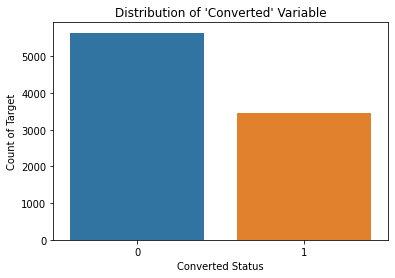

In [80]:
#Converted is the target variable, Indicates whether a lead has been successfully converted (1) or not (0).
#Visualizing Distribution of 'Converted' Variable

sns.countplot(leads.Converted)
plt.xlabel("Converted Status")
plt.ylabel("Count of Target")
plt.title("Distribution of 'Converted' Variable")
plt.show()

In [81]:
#Check the % of Data that has Converted Values = 1:

Converted = (sum(leads['Converted'])/len(leads['Converted'].index))*100
Converted

38.02043282434362

Currently Lead conversion rate is only 38%

In [82]:
# List out the numerical variables that are part of the DataFrame
num_var=['TotalVisits','Total Time Spent on Website','Page Views Per Visit']
leads[num_var].describe()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9103.000000,9103.000000,9103.000000
mean,3.445238,481.350104,2.362820
std,4.854853,545.066142,2.161418
min,0.000000,0.000000,0.000000
25%,1.000000,9.000000,1.000000
50%,3.000000,244.000000,2.000000
75%,5.000000,919.500000,3.000000
max,251.000000,2272.000000,55.000000


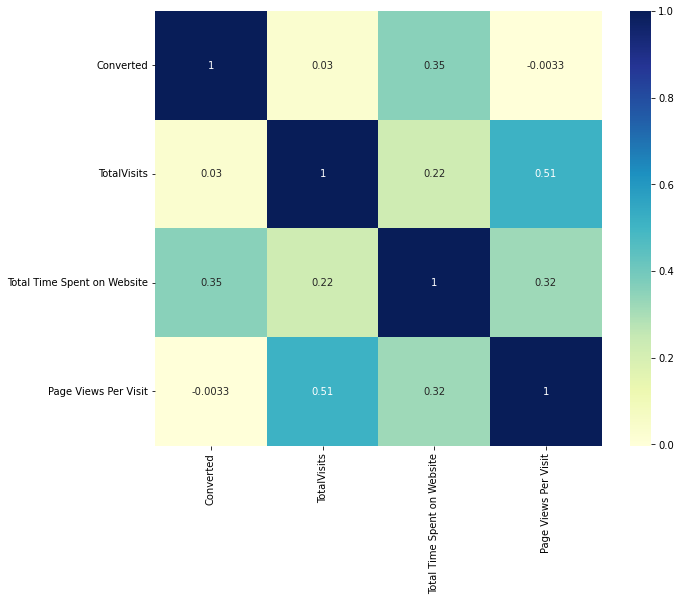

In [83]:
#Checking correlations of numeric values using heatmap

# Size of the figure
plt.figure(figsize=(10,8))

# heatmap
sns.heatmap(leads.corr(), cmap="YlGnBu", annot=True)
plt.show()

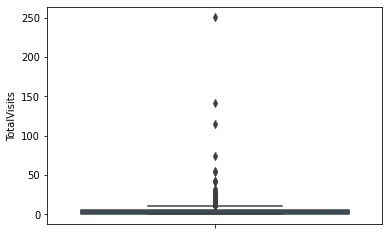

In [84]:
#Total Visits
#visualizing spread of variable

plt.figure(figsize=(6,4))
sns.boxplot(y=leads['TotalVisits'])
plt.show()

As we can see there are outliers present in this column.

In [85]:
#checking percentile values for "Total Visits"

leads['TotalVisits'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

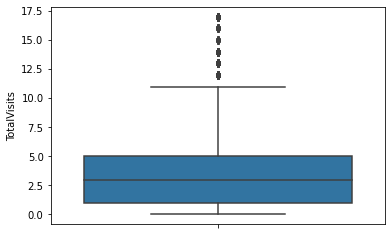

In [86]:
#Outlier Treatment: capping the outliers to 99% value for analysis

percentiles = leads['TotalVisits'].quantile([0.05,0.99]).values
leads['TotalVisits'][leads['TotalVisits'] <= percentiles[0]] = percentiles[0]
leads['TotalVisits'][leads['TotalVisits'] >= percentiles[1]] = percentiles[1]

#visualizing variable after outlier treatment
sns.boxplot(y=leads['TotalVisits'])
plt.show()

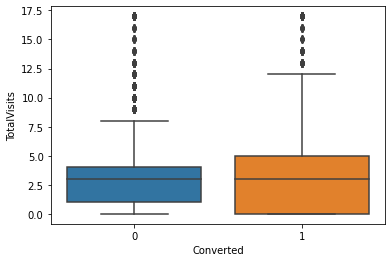

In [87]:
# Visualizing TotalVisits w.r.t Target Variable 'Converted'
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = leads)
plt.show()

As the median for both converted and non-converted leads are same , nothing coclusive can be said on the basis of variable TotalVisits

In [88]:
#checking percentiles for "Total Time Spent on Website"

leads['Total Time Spent on Website'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9103.000000
mean      481.350104
std       545.066142
min         0.000000
5%          0.000000
25%         9.000000
50%       244.000000
75%       919.500000
90%      1372.000000
95%      1556.900000
99%      1838.960000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

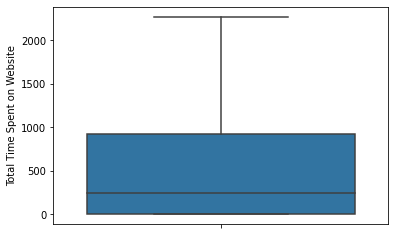

In [89]:
#visualizing spread of variable 'Total Time Spent on Website'
sns.boxplot(y = leads['Total Time Spent on Website'])
plt.show()

Since there are no major outliers for the above variable, outlier treatment is not required for it.

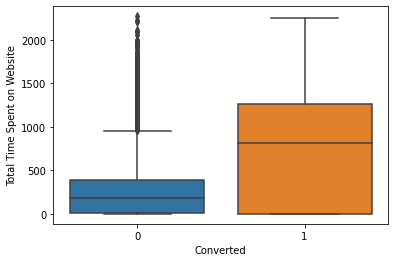

In [90]:
# Visualizing 'Total Time Spent on Website' w.r.t Target Variable 'converted'

sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = leads)
plt.show()

Leads spend more time on the website therefore more engagement should be shown on website.

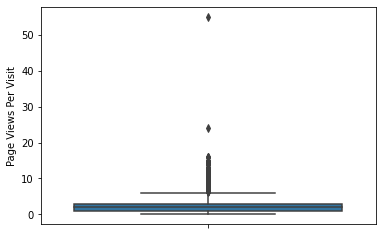

In [91]:
#visualizing spread of numeric variable 'Page Views Per Visit'

plt.figure(figsize=(6,4))
sns.boxplot(y=leads['Page Views Per Visit'])
plt.show()

As there as outliers thus we need to treat them.

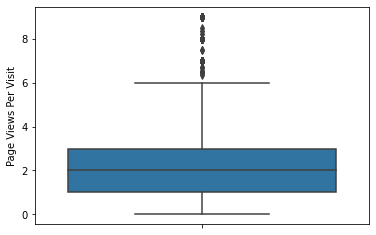

In [92]:
#Outlier Treatment: capping the outliers to 95% value for analysis
percentiles = leads['Page Views Per Visit'].quantile([0.05,0.99]).values
leads['Page Views Per Visit'][leads['Page Views Per Visit'] <= percentiles[0]] = percentiles[0]
leads['Page Views Per Visit'][leads['Page Views Per Visit'] >= percentiles[1]] = percentiles[1]

#visualizing variable after outlier treatment
sns.boxplot(y=leads['Page Views Per Visit'])
plt.show()

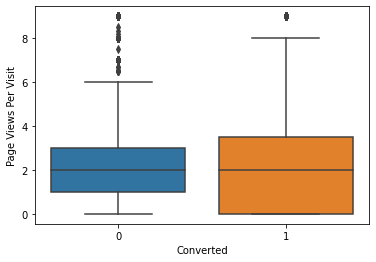

In [93]:
#checking Spread of "Page Views Per Visit" vs Converted variable

sns.boxplot(x=leads.Converted,y=leads['Page Views Per Visit'])
plt.show()

- Median for converted and unconverted leads is the same.
- Nothing can be said specifically for lead conversion from Page Views Per Visit

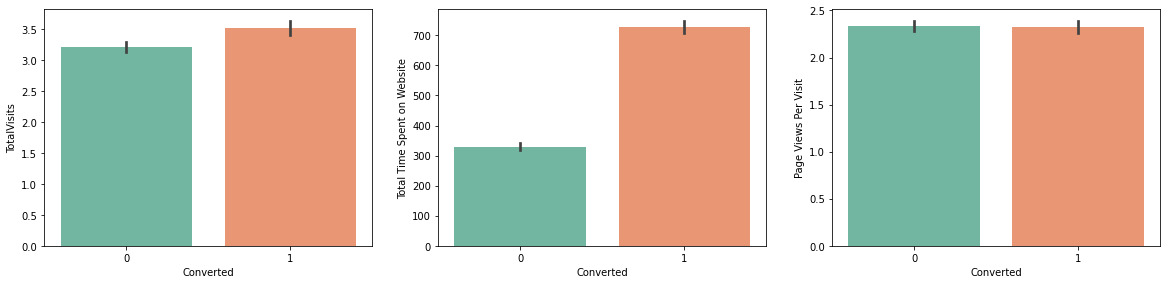

In [94]:
# Now checking the conversions for all numeric values

plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
sns.barplot(y = 'TotalVisits', x='Converted', palette='Set2', data = leads)
plt.subplot(4,3,2)
sns.barplot(y = 'Total Time Spent on Website', x='Converted', palette='Set2', data = leads)
plt.subplot(4,3,3)
sns.barplot(y = 'Page Views Per Visit', x='Converted', palette='Set2', data = leads)
plt.show()

The conversion rate is high for Total Visits, Total Time Spent on Website and Page Views Per Visit

In [95]:
leads.isnull().sum()

Lead Origin                               0
Lead Source                               0
Do Not Email                              0
Converted                                 0
TotalVisits                               0
Total Time Spent on Website               0
Page Views Per Visit                      0
Last Activity                             0
Specialization                            0
What is your current occupation           0
A free copy of Mastering The Interview    0
Last Notable Activity                     0
dtype: int64

### Now, all data labels are in good shape , we will proceed to our next step which is Data Preparation

##  Data Preparation

### Creating Dummy Variables

In [96]:
#getting a list of categorical columns

cat_cols= leads.select_dtypes(include=['object']).columns
cat_cols

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Specialization', 'What is your current occupation',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [97]:
leads['Last Notable Activity'].unique()

array(['Modified', 'Email Opened', 'Page Visited on Website',
       'Other_Notable_activity', 'Email Link Clicked',
       'Olark Chat Conversation', 'SMS Sent'], dtype=object)

In [98]:
# List of variables to map

varlist =  ['A free copy of Mastering The Interview','Do Not Email']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
leads[varlist] = leads[varlist].apply(binary_map)

In [99]:
#getting dummies and dropping the first column and adding the results to the master dataframe
dummy = pd.get_dummies(leads[['Lead Origin','What is your current occupation']], drop_first=True)

leads = pd.concat([leads,dummy],1)

In [100]:
dummy = pd.get_dummies(leads['Specialization'], prefix  = 'Specialization')
dummy = dummy.drop(['Specialization_Not Specified'], 1)
leads = pd.concat([leads, dummy], axis = 1)

In [101]:
dummy = pd.get_dummies(leads['Lead Source'], prefix  = 'Lead Source')
dummy = dummy.drop(['Lead Source_Others'], 1)
leads = pd.concat([leads, dummy], axis = 1)

In [102]:
dummy = pd.get_dummies(leads['Last Activity'], prefix  = 'Last Activity')
dummy = dummy.drop(['Last Activity_Others'], 1)
leads = pd.concat([leads, dummy], axis = 1)

In [103]:
dummy = pd.get_dummies(leads['Last Notable Activity'], prefix  = 'Last Notable Activity')
dummy = dummy.drop(['Last Notable Activity_Other_Notable_activity'], 1)
leads = pd.concat([leads, dummy], axis = 1)

In [104]:
#dropping the original columns after dummy variable creation

leads.drop(cat_cols,1,inplace = True)

In [105]:
leads.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,...,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,0,0.0,0,0.0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,1,2.0,1532,2.0,1,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
3,0,1.0,305,1.0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,1,2.0,1428,1.0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


## TEST - TRAIN SPLIT

In [106]:
from sklearn.model_selection import train_test_split

# Putting response variable to y
y = leads['Converted']


X=leads.drop('Converted', axis=1)

In [107]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [108]:
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,...,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,0.0,0,0.0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,1,0,0,0
1,5.0,674,2.5,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
2,2.0,1532,2.0,1,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,1.0,305,1.0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
4,2.0,1428,1.0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0


In [109]:
# Splitting the data into train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [110]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6372 entries, 7962 to 5734
Data columns (total 44 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   TotalVisits                                           6372 non-null   float64
 1   Total Time Spent on Website                           6372 non-null   int64  
 2   Page Views Per Visit                                  6372 non-null   float64
 3   Lead Origin_Landing Page Submission                   6372 non-null   uint8  
 4   Lead Origin_Lead Add Form                             6372 non-null   uint8  
 5   Lead Origin_Lead Import                               6372 non-null   uint8  
 6   What is your current occupation_Housewife             6372 non-null   uint8  
 7   What is your current occupation_Other                 6372 non-null   uint8  
 8   What is your current occupation_Student               6

###  Feature Scaling

In [111]:
#importing library for feature scaling

from sklearn.preprocessing import StandardScaler

In [112]:
#scaling of features
scaler = StandardScaler()

num_cols=X_train.select_dtypes(include=['float64', 'int64']).columns

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

#checking X-train dataset after scaling
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,...,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
7962,-0.105932,1.476324,-0.420056,1,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1
5520,1.113025,-0.771066,2.354047,1,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1962,0.503547,-0.571257,0.084327,1,0,0,0,0,0,1,...,0,0,0,1,0,0,1,0,0,0
1566,3.246199,1.393834,0.588709,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
9170,-1.020149,-0.881052,-1.176630,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0


## Model Building using Stats Model & RFE

In [113]:
# importing necessary library
import statsmodels.api as sm

In [114]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

from sklearn.feature_selection import RFE
rfe = RFE(logreg, n_features_to_select= 15)
rfe = rfe.fit(X_train, y_train)

In [115]:
rfe.support_

array([False,  True, False, False,  True,  True,  True, False, False,
       False,  True,  True, False,  True, False, False, False, False,
       False,  True, False, False, False, False,  True, False, False,
       False, False,  True,  True,  True, False, False,  True,  True,
       False, False, False, False, False, False, False,  True])

In [116]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 21),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 22),
 ('Lead Origin_Landing Page Submission', False, 2),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', True, 1),
 ('What is your current occupation_Housewife', True, 1),
 ('What is your current occupation_Other', False, 18),
 ('What is your current occupation_Student', False, 11),
 ('What is your current occupation_Unemployed', False, 9),
 ('What is your current occupation_Working Professional', True, 1),
 ('Specialization_Banking, Investment And Insurance', True, 1),
 ('Specialization_Business Administration', False, 6),
 ('Specialization_E-Business', True, 1),
 ('Specialization_E-COMMERCE', False, 10),
 ('Specialization_International Business', False, 7),
 ('Specialization_Management_Specializations', False, 3),
 ('Specialization_Media and Advertising', False, 8),
 ('Specialization_Rural and Agribusiness', False, 4),
 ('Specialization_Services Excellence', 

In [117]:
#list of RFE supported columns
col = X_train.columns[rfe.support_]
col

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'What is your current occupation_Housewife',
       'What is your current occupation_Working Professional',
       'Specialization_Banking, Investment And Insurance',
       'Specialization_E-Business', 'Specialization_Services Excellence',
       'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Olark Chat Conversation',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

In [118]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission',
       'What is your current occupation_Other',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'Specialization_Business Administration', 'Specialization_E-COMMERCE',
       'Specialization_International Business',
       'Specialization_Management_Specializations',
       'Specialization_Media and Advertising',
       'Specialization_Rural and Agribusiness',
       'Specialization_Travel and Tourism', 'Lead Source_Direct Traffic',
       'Lead Source_Facebook', 'Lead Source_Google',
       'Lead Source_Organic Search', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Lead Source_Social Media',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Opened',
       'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent',
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Em

### Model 1

In [119]:
X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6356
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2697.7
Date:                Tue, 03 Jan 2023   Deviance:                       5395.3
Time:                        19:09:35   Pearson chi2:                 6.48e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3819
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.3898      0.052    -26.554      0.000      -1.492      -1.287
Total Time Spent on Website                              1.1197      0.040     28.342      0.000       1.042       1.197
Lead Origin_Lead Add Form                                3.9591      0.223     17.791      0.000       3.523       4.395
Lead Origin_Lead Import                                  1.4655      0.445      3.291      0.001       0.593       2.338
What is your current occupation_Housewife               23.3634   1.59e+04      0.001      0.999   -3.11e+04    3.12e+04
What is your current occupation_Working Professional     2.8559      0.187     15.236      0.000       2.489       3.223
Specialization_Banking, Investment And Insurance         0.3441      0.177      1.949      0.051      -0.002       0.690
Specialization_E-Business                                0.7692      0.426      1.807      0.071      -0.065       1.604
Specialization_Services Excellence                       0.6594      0.561      1.175      0.240      -0.440       1.759
Lead Source_Olark Chat                                   1.1612      0.103     11.288      0.000       0.960       1.363
Lead Source_Welingak Website                             1.8699      0.756      2.474      0.013       0.388       3.352
Last Activity_Converted to Lead                         -1.3059      0.210     -6.218      0.000      -1.718      -0.894
Last Activity_Email Bounced                             -2.0477      0.314     -6.514      0.000      -2.664      -1.432
Last Activity_Form Submitted on Website                 -0.6986      0.318     -2.198      0.028      -1.321      -0.076
Last Activity_Olark Chat Conversation                   -1.4719      0.160     -9.220      0.000      -1.785      -1.159
Last Notable Activity_SMS Sent                           1.4015      0.079     17.822      0.000       1.247       1.556
========================================================================================================================
"""

### p-value of variable What is your current occupation_Housewife is high, so we can drop it.

In [120]:
#dropping column with high p-value

col = col.drop('What is your current occupation_Housewife',1)

### Model 2

In [121]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6357
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2705.0
Date:                Tue, 03 Jan 2023   Deviance:                       5410.1
Time:                        19:09:35   Pearson chi2:                 6.49e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3804
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.3821      0.052    -26.479      0.000      -1.484      -1.280
Total Time Spent on Website                              1.1191      0.039     28.368      0.000       1.042       1.196
Lead Origin_Lead Add Form                                3.9588      0.222     17.806      0.000       3.523       4.395
Lead Origin_Lead Import                                  1.4579      0.445      3.275      0.001       0.585       2.330
What is your current occupation_Working Professional     2.8490      0.187     15.208      0.000       2.482       3.216
Specialization_Banking, Investment And Insurance         0.3385      0.176      1.919      0.055      -0.007       0.684
Specialization_E-Business                                0.7590      0.425      1.786      0.074      -0.074       1.592
Specialization_Services Excellence                       0.6542      0.561      1.167      0.243      -0.445       1.753
Lead Source_Olark Chat                                   1.1549      0.103     11.240      0.000       0.953       1.356
Lead Source_Welingak Website                             1.8639      0.756      2.466      0.014       0.382       3.345
Last Activity_Converted to Lead                         -1.3122      0.210     -6.250      0.000      -1.724      -0.901
Last Activity_Email Bounced                             -2.0528      0.314     -6.533      0.000      -2.669      -1.437
Last Activity_Form Submitted on Website                 -0.6256      0.312     -2.008      0.045      -1.236      -0.015
Last Activity_Olark Chat Conversation                   -1.4751      0.160     -9.243      0.000      -1.788      -1.162
Last Notable Activity_SMS Sent                           1.3954      0.079     17.759      0.000       1.241       1.549
========================================================================================================================
"""

### p-value of variable 'Specialization_Services Excellence' is high, so we can drop it.

In [122]:
#dropping column with high p-value

col = col.drop('Specialization_Services Excellence',1)

### Model 3

In [123]:
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6358
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2705.7
Date:                Tue, 03 Jan 2023   Deviance:                       5411.4
Time:                        19:09:35   Pearson chi2:                 6.49e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3803
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.3790      0.052    -26.467      0.000      -1.481      -1.277
Total Time Spent on Website                              1.1184      0.039     28.362      0.000       1.041       1.196
Lead Origin_Lead Add Form                                3.9587      0.222     17.807      0.000       3.523       4.394
Lead Origin_Lead Import                                  1.4543      0.445      3.267      0.001       0.582       2.327
What is your current occupation_Working Professional     2.8461      0.187     15.198      0.000       2.479       3.213
Specialization_Banking, Investment And Insurance         0.3358      0.176      1.904      0.057      -0.010       0.681
Specialization_E-Business                                0.7560      0.425      1.779      0.075      -0.077       1.589
Lead Source_Olark Chat                                   1.1520      0.103     11.220      0.000       0.951       1.353
Lead Source_Welingak Website                             1.8587      0.756      2.460      0.014       0.378       3.340
Last Activity_Converted to Lead                         -1.3144      0.210     -6.262      0.000      -1.726      -0.903
Last Activity_Email Bounced                             -2.0339      0.314     -6.480      0.000      -2.649      -1.419
Last Activity_Form Submitted on Website                 -0.6276      0.311     -2.015      0.044      -1.238      -0.017
Last Activity_Olark Chat Conversation                   -1.4747      0.160     -9.241      0.000      -1.788      -1.162
Last Notable Activity_SMS Sent                           1.3949      0.079     17.759      0.000       1.241       1.549
========================================================================================================================
"""

### p-value of variable 'Specialization_E-Business' is high, so we can drop it.

In [124]:
#dropping column with high p-value

col = col.drop('Specialization_E-Business',1)

### Model 4

In [125]:
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6359
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2707.2
Date:                Tue, 03 Jan 2023   Deviance:                       5414.4
Time:                        19:09:35   Pearson chi2:                 6.50e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3800
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.3719      0.052    -26.440      0.000      -1.474      -1.270
Total Time Spent on Website                              1.1179      0.039     28.364      0.000       1.041       1.195
Lead Origin_Lead Add Form                                3.9578      0.222     17.809      0.000       3.522       4.393
Lead Origin_Lead Import                                  1.4471      0.445      3.252      0.001       0.575       2.319
What is your current occupation_Working Professional     2.8403      0.187     15.172      0.000       2.473       3.207
Specialization_Banking, Investment And Insurance         0.3299      0.176      1.872      0.061      -0.016       0.675
Lead Source_Olark Chat                                   1.1446      0.103     11.163      0.000       0.944       1.346
Lead Source_Welingak Website                             1.8525      0.756      2.451      0.014       0.371       3.334
Last Activity_Converted to Lead                         -1.3177      0.210     -6.276      0.000      -1.729      -0.906
Last Activity_Email Bounced                             -2.0352      0.314     -6.483      0.000      -2.650      -1.420
Last Activity_Form Submitted on Website                 -0.6161      0.313     -1.971      0.049      -1.229      -0.004
Last Activity_Olark Chat Conversation                   -1.4714      0.159     -9.234      0.000      -1.784      -1.159
Last Notable Activity_SMS Sent                           1.3926      0.078     17.742      0.000       1.239       1.546
========================================================================================================================
"""

Dropping 'Specialization_Banking, Investment And Insurance' as it has high p value

In [126]:
col = col.drop('Specialization_Banking, Investment And Insurance',1)

### Model 5

In [127]:
X_train_sm = sm.add_constant(X_train[col])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6360
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2709.0
Date:                Tue, 03 Jan 2023   Deviance:                       5417.9
Time:                        19:09:36   Pearson chi2:                 6.51e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3797
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.3563      0.051    -26.540      0.000      -1.456      -1.256
Total Time Spent on Website                              1.1182      0.039     28.381      0.000       1.041       1.195
Lead Origin_Lead Add Form                                3.9603      0.222     17.824      0.000       3.525       4.396
Lead Origin_Lead Import                                  1.4318      0.445      3.218      0.001       0.560       2.304
What is your current occupation_Working Professional     2.8370      0.187     15.165      0.000       2.470       3.204
Lead Source_Olark Chat                                   1.1323      0.102     11.074      0.000       0.932       1.333
Lead Source_Welingak Website                             1.8352      0.756      2.429      0.015       0.354       3.316
Last Activity_Converted to Lead                         -1.3274      0.210     -6.324      0.000      -1.739      -0.916
Last Activity_Email Bounced                             -2.0428      0.314     -6.505      0.000      -2.658      -1.427
Last Activity_Form Submitted on Website                 -0.6240      0.313     -1.994      0.046      -1.237      -0.011
Last Activity_Olark Chat Conversation                   -1.4742      0.159     -9.254      0.000      -1.786      -1.162
Last Notable Activity_SMS Sent                           1.3932      0.078     17.762      0.000       1.240       1.547
========================================================================================================================
"""

Dropping 'Last Activity_Form Submitted on Website' as it has high p value

In [128]:
col = col.drop('Last Activity_Form Submitted on Website',1)

### Model 6

In [129]:
X_train_sm = sm.add_constant(X_train[col])
logm6 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6361
Model Family:                Binomial   Df Model:                           10
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2711.1
Date:                Tue, 03 Jan 2023   Deviance:                       5422.2
Time:                        19:09:36   Pearson chi2:                 6.51e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3793
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.3694      0.051    -26.976      0.000      -1.469      -1.270
Total Time Spent on Website                              1.1171      0.039     28.363      0.000       1.040       1.194
Lead Origin_Lead Add Form                                3.9600      0.222     17.832      0.000       3.525       4.395
Lead Origin_Lead Import                                  1.4437      0.445      3.246      0.001       0.572       2.316
What is your current occupation_Working Professional     2.8277      0.187     15.154      0.000       2.462       3.193
Lead Source_Olark Chat                                   1.1350      0.102     11.093      0.000       0.934       1.335
Lead Source_Welingak Website                             1.8433      0.756      2.440      0.015       0.362       3.324
Last Activity_Converted to Lead                         -1.3123      0.210     -6.259      0.000      -1.723      -0.901
Last Activity_Email Bounced                             -2.0286      0.314     -6.464      0.000      -2.644      -1.413
Last Activity_Olark Chat Conversation                   -1.4626      0.159     -9.187      0.000      -1.775      -1.151
Last Notable Activity_SMS Sent                           1.4062      0.078     17.980      0.000       1.253       1.559
========================================================================================================================
"""

Dropping 'Lead Source_Welingak Website' as it has high p-value

In [130]:
col = col.drop('Lead Source_Welingak Website',1)

### Model 7

In [131]:
X_train_sm = sm.add_constant(X_train[col])
logm7 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm7.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6362
Model Family:                Binomial   Df Model:                            9
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2715.8
Date:                Tue, 03 Jan 2023   Deviance:                       5431.5
Time:                        19:09:36   Pearson chi2:                 6.65e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3783
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.3703      0.051    -26.994      0.000      -1.470      -1.271
Total Time Spent on Website                              1.1167      0.039     28.358      0.000       1.040       1.194
Lead Origin_Lead Add Form                                4.2671      0.212     20.125      0.000       3.852       4.683
Lead Origin_Lead Import                                  1.4446      0.445      3.248      0.001       0.573       2.316
What is your current occupation_Working Professional     2.8203      0.187     15.102      0.000       2.454       3.186
Lead Source_Olark Chat                                   1.1337      0.102     11.082      0.000       0.933       1.334
Last Activity_Converted to Lead                         -1.3103      0.210     -6.251      0.000      -1.721      -0.899
Last Activity_Email Bounced                             -1.9949      0.309     -6.457      0.000      -2.600      -1.389
Last Activity_Olark Chat Conversation                   -1.4567      0.159     -9.174      0.000      -1.768      -1.146
Last Notable Activity_SMS Sent                           1.4088      0.078     18.024      0.000       1.256       1.562
========================================================================================================================
"""

Since Model 5 seems to be stable with significant p-values, we shall go ahead with this model for our further analysis.

### CALCULATING VIF

In [132]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [133]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,Lead Source_Olark Chat,1.56
7,Last Activity_Olark Chat Conversation,1.35
0,Total Time Spent on Website,1.26
1,Lead Origin_Lead Add Form,1.18
8,Last Notable Activity_SMS Sent,1.17
3,What is your current occupation_Working Profes...,1.12
6,Last Activity_Email Bounced,1.01
2,Lead Origin_Lead Import,1.00
5,Last Activity_Converted to Lead,1.00


All variables have a good value of VIF. So we don't neet to drop any more variables and we can proceed with making predictions using this model only

In [134]:
# Getting the Predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

7962    0.843834
5520    0.096969
1962    0.118340
1566    0.952864
9170    0.227843
5097    0.227843
8954    0.461765
309     0.139936
5519    0.546916
1050    0.468796
dtype: float64

In [135]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.84383371, 0.09696898, 0.11834045, 0.95286396, 0.2278425 ,
       0.2278425 , 0.46176503, 0.13993616, 0.54691571, 0.46879566])

In [136]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,0,0.843834,7962
1,0,0.096969,5520
2,0,0.118340,1962
3,1,0.952864,1566
4,0,0.227843,9170


In [137]:
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted
0,0,0.843834,7962,1
1,0,0.096969,5520,0
2,0,0.118340,1962,0
3,1,0.952864,1566,1
4,0,0.227843,9170,0


In [138]:
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[3495  458]
 [ 749 1670]]


In [139]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.8105775266792216


In [140]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [141]:
# Let's see the sensitivity of our logistic regression model

TP / float(TP+FN)

0.6903679206283588

In [142]:
# Let us calculate specificity

TN / float(TN+FP)

0.884138628889451

In [143]:
# Calculate False Postive Rate - predicting conversion when customer does not have convert

print(FP/ float(TN+FP))

0.11586137111054895


In [144]:
# positive predictive value 

print (TP / float(TP+FP))

0.7847744360902256


In [145]:
# Negative predictive value

print (TN / float(TN+ FN))

0.8235155513666352


### Plotting ROC Curve

In [146]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [147]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

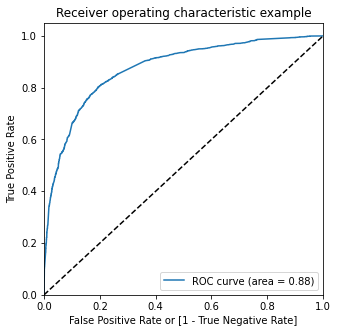

In [148]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

The ROC Curve should be a value close to 1. We are getting a good value of 0.88 indicating a good predictive model.

### Finding Optimal Cutoff Point

Above we had chosen an arbitrary cut-off value of 0.5. We need to determine the best cut-off value and the below section deals with that: 

In [149]:
# creating columns with different probability cutoffs 

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.843834,7962,1,1,1,1,1,1,1,1,1,1,0
1,0,0.096969,5520,0,1,0,0,0,0,0,0,0,0,0
2,0,0.118340,1962,0,1,1,0,0,0,0,0,0,0,0
3,1,0.952864,1566,1,1,1,1,1,1,1,1,1,1,1
4,0,0.227843,9170,0,1,1,1,0,0,0,0,0,0,0


In [150]:
# calculating accuracy sensitivity and specificity for various probability cutoffs.

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.379630  1.000000  0.000000
0.1   0.1  0.571720  0.967755  0.329370
0.2   0.2  0.729441  0.909053  0.619529
0.3   0.3  0.792844  0.825548  0.772831
0.4   0.4  0.810421  0.759405  0.841639
0.5   0.5  0.810578  0.690368  0.884139
0.6   0.6  0.793315  0.576685  0.925879
0.7   0.7  0.776208  0.494006  0.948900
0.8   0.8  0.757062  0.405539  0.972173
0.9   0.9  0.702448  0.232327  0.990134


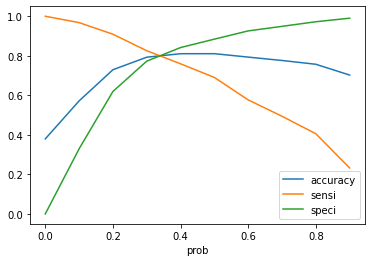

In [151]:
# plotting accuracy sensitivity and specificity for various probabilities.

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.35 is the optimum point to take it as a cutoff probability.

In [152]:
y_train_pred_final['final_Predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.35 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_Predicted
0,0,0.843834,7962,1,1,1,1,1,1,1,1,1,1,0,1
1,0,0.096969,5520,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.118340,1962,0,1,1,0,0,0,0,0,0,0,0,0
3,1,0.952864,1566,1,1,1,1,1,1,1,1,1,1,1,1
4,0,0.227843,9170,0,1,1,1,0,0,0,0,0,0,0,0


In [153]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final[['Converted','Converted_prob','Prospect ID','final_Predicted','Lead_Score']].head()

,Converted,Converted_prob,Prospect ID,final_Predicted,Lead_Score
0,0,0.843834,7962,1,84
1,0,0.096969,5520,0,10
2,0,0.118340,1962,0,12
3,1,0.952864,1566,1,95
4,0,0.227843,9170,0,23


In [154]:
# Let's check the overall accuracy.

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.8049278091650973

In [155]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion2

array([[3208,  745],
       [ 498, 1921]], dtype=int64)

In [156]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [157]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7941298057048367

In [158]:
# Let us calculate specificity
TN / float(TN+FP)

0.8115355426258538

### Observation:
So as we can see above the model seems to be performing well. The ROC curve has a value of 0.88, which is very good. We have the following values for the Train Data:
    - Accuracy     : 80.5%
    - Sensitivity : 79.4%
    - Specificity : 81.1%

In [159]:
# Calculate False Postive Rate - predicting conversion when customer does not have convert
print(FP/ float(TN+FP))

0.18846445737414622


In [160]:
# Positive predictive value 
print (TP / float(TP+FP))

0.7205551387846961


In [161]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8656233135456017


In [162]:
#Looking at the confusion matrix again

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion

array([[3208,  745],
       [ 498, 1921]], dtype=int64)

In [163]:
##### Precision
TP / TP + FP

confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7205551387846961

In [164]:
##### Recall
TP / TP + FN

confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.7941298057048367

In [165]:
from sklearn.metrics import precision_score, recall_score

In [166]:
precision_score(y_train_pred_final.Converted , y_train_pred_final.final_Predicted)

0.7205551387846961

In [167]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.7941298057048367

In [168]:
from sklearn.metrics import precision_recall_curve

In [169]:
y_train_pred_final.Converted, y_train_pred_final.final_Predicted
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

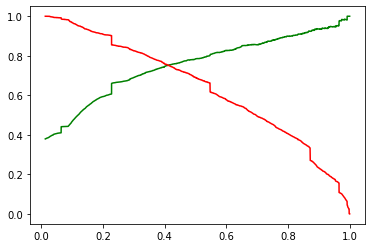

In [170]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [171]:
#scaling test set

num_cols=X_test.select_dtypes(include=['float64', 'int64']).columns

X_test[num_cols] = scaler.fit_transform(X_test[num_cols])

X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,...,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
3504,-0.093651,-0.108519,0.332853,1,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
4050,-1.036255,-0.888077,-1.172766,0,1,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1
7201,-0.407852,0.420993,-0.169020,1,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1
1196,0.220551,-0.110357,0.834727,1,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
8219,1.163155,-0.433947,-0.294488,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0


In [172]:
X_test = X_test[col]
X_test.head()

,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Working Professional,Lead Source_Olark Chat,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Olark Chat Conversation,Last Notable Activity_SMS Sent
3504,-0.108519,0,0,0,0,0,0,0,0
4050,-0.888077,1,0,0,0,0,0,0,1
7201,0.420993,0,0,0,0,0,0,0,1
1196,-0.110357,0,0,0,0,0,0,0,0
8219,-0.433947,0,0,0,0,0,0,0,0


In [173]:
X_test_sm = sm.add_constant(X_test)

### PREDICTIONS ON TEST SET

In [174]:
y_test_pred = res.predict(X_test_sm)

In [175]:
y_test_pred[:10]

3504    0.183696
4050    0.964902
7201    0.624467
1196    0.183389
8219    0.135298
8747    0.226465
9048    0.768187
6524    0.118272
7693    0.342658
8187    0.964902
dtype: float64

In [176]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [177]:
# Let's see the head
y_pred_1.head()

,0
3504,0.183696
4050,0.964902
7201,0.624467
1196,0.183389
8219,0.135298


In [178]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [179]:
# Putting CustID to index
y_test_df['Prospect ID'] = y_test_df.index

In [180]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [181]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [182]:
y_pred_final.head()

,Converted,Prospect ID,0
0,0,3504,0.183696
1,1,4050,0.964902
2,0,7201,0.624467
3,0,1196,0.183389
4,1,8219,0.135298


In [183]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [184]:
y_pred_final.head()

,Converted,Prospect ID,Converted_prob
0,0,3504,0.183696
1,1,4050,0.964902
2,0,7201,0.624467
3,0,1196,0.183389
4,1,8219,0.135298


In [185]:
# Rearranging the columns
y_pred_final = y_pred_final[['Prospect ID','Converted','Converted_prob']]
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))

In [186]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score
0,3504,0,0.183696,18
1,4050,1,0.964902,96
2,7201,0,0.624467,62
3,1196,0,0.183389,18
4,8219,1,0.135298,14


In [196]:
y_pred_final['final_Predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.4 else 0)

In [197]:
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score,final_Predicted
0,3504,0,0.183696,18,0
1,4050,1,0.964902,96,1
2,7201,0,0.624467,62,1
3,1196,0,0.183389,18,0
4,8219,1,0.135298,14,0


In [198]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.8088612229952399

In [199]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_Predicted )
confusion2

array([[1415,  274],
       [ 248,  794]], dtype=int64)

In [200]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [201]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.761996161228407

In [202]:
# Let us calculate specificity
TN / float(TN+FP)

0.8377738306690349

In [203]:
precision_score(y_pred_final.Converted , y_pred_final.final_Predicted)

0.7434456928838952

In [204]:
recall_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.761996161228407

### Observation:
After running the model on the Test Data these are the figures we obtain:
- Accuracy : 80.88%
- Sensitivity : 76.1%
- Specificity : 83.77%

## Final Observation:

Let us compare the values obtained for Train & Test:

 Train Data:
 - Accuracy     : 80.5%
- Sensitivity : 79.4%
- Specificity : 81.1%

 Test Data:
- Accuracy : 80.88%
- Sensitivity : 76.1%
- Specificity : 83.77%

The Model seems to predict the Conversion Rate very well and we should be able to give the CEO confidence in making good calls based on this model